<a href="https://colab.research.google.com/github/juheo/LG_datascience_MARG/blob/master/day4_final_project_template_update.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# FINAL PROJECT TEMPLATE





In [0]:
# train data (numpy ver) download
!wget --no-check-certificate -qq -r 'https://docs.google.com/uc?export=download&id=1CFKZf97pTozo2DNPnDsMcY0SVPvN8mj-' -O recordings_npy.zip
!mkdir speech_mnist
!unzip -qq /content/recordings_npy.zip -d ./speech_mnist

In [0]:
import glob
import numpy as np 
import librosa
import matplotlib.pyplot as plt 
from sklearn.model_selection import train_test_split
from keras.models import Sequential, Model, Input, load_model
from keras.layers import Dense, Dropout, Activation, Flatten, Conv2D, Conv1D, BatchNormalization,pooling
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint


# baseline model 

def pad(mel, max_length):
  if np.shape(mel)[1] >= max_length:
    return mel[:,:max_length]
  else :
    pad_length = max_length-np.shape(mel)[1]
    return np.concatenate((mel, np.zeros((128, pad_length))), axis=1)


def preprocessing(wav_path):
  X_temp = []
  Y = []
  sr = 8000
  n_fft = 512
  hop_length = 128
  classes = 10
  for item in wav_path:
    audio = np.load(item)
    melspectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=n_fft, hop_length =hop_length)
    mel_norm = melspectrogram/np.max(melspectrogram)
    mel_log = np.log(mel_norm+1e-5)
    X_temp.append(melspectrogram)
    label = np.eye(classes)[(int)(item.split('/')[-1].split('_')[0])]
    Y.append(label)
  
  all_length = [] 
  for item in X_temp:
    all_length.append(np.shape(item)[1])
  max_length = np.max(all_length)

  X = []
  for item in X_temp:
    X.append(pad(item, max_length))

  X = np.asarray(X)
  Y = np.asarray(Y)
  return X, Y



def preprocessing_test(wav_path):
  X_temp = []
  Y = []
  sr = 8000
  n_fft = 512
  hop_length = 128
  classes = 10
  for item in wav_path:
    audio, sr = librosa.load(item, sr=sr)
    melspectrogram = librosa.feature.melspectrogram(y=audio, sr=sr, n_fft=n_fft, hop_length =hop_length)
    mel_norm = melspectrogram/np.max(melspectrogram)
    mel_log = np.log(mel_norm+1e-5)
    X_temp.append(melspectrogram)
    label = np.eye(classes)[(int)(item.split('/')[-1].split('_')[0])]
    Y.append(label)
  
  all_length = [] 
  for item in X_temp:
    all_length.append(np.shape(item)[1])
  max_length = np.max(all_length)

  X = []
  for item in X_temp:
    X.append(pad(item, max_length))

  X = np.asarray(X)
  Y = np.asarray(Y)
  return X, Y


def build_model():
  model = Sequential()
  model.add(BatchNormalization(input_shape=(128,143)))
  model.add(Activation('relu'))
  model.add(Conv1D(64,3,padding='same',kernel_initializer='he_normal'))
  model.add(BatchNormalization())
  model.add(Activation('relu'))
  model.add(Conv1D(64,3,padding='same',kernel_initializer='he_normal'))
  model.add(pooling.MaxPooling1D(pool_size=2))
  model.add(pooling.MaxPooling1D(pool_size=2))
  model.add(pooling.AveragePooling1D(pool_size=2))
  model.add(Flatten())
  model.add(Dense(32, activation='relu'))
  model.add(Dense(10, activation='softmax'))
  return model


def train(model, X, Y):
  X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.1, random_state=777)
  model.compile(loss = 'categorical_crossentropy', optimizer = 'adam', metrics = ['accuracy'])
  hist = model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=0, validation_split=0.1)
  return hist


def evaluate(model, X, Y):
  print(model.evaluate(X, Y))

In [0]:
# train data download
!wget --no-check-certificate -qq -r 'https://docs.google.com/uc?export=download&id=1Rz0x4BqPDO6HgnuZMpkSYOFeYPWWZjav' -O recordings.zip
!mkdir speech_mnist_test
!unzip -qq /content/recordings.zip -d ./speech_mnist_test

In [0]:
# evaluate

wav_path = sorted(glob.glob('./speech_mnist/*.npy'))
test_path = glob.glob('/content/speech_mnist_test/audio_test_two/*.wav')
X, Y = preprocessing(wav_path)
X_test, Y_test = preprocessing_test(test_path)
print(np.shape(X))
print(np.shape(X_test))

(2000, 128, 143)
(20, 128, 70)


In [0]:
X_test_final = np.concatenate((X_test, np.zeros((20,128,73))),axis=-1)

In [0]:
model = build_model()
hist = train(model, X, Y)
evaluate(model, X_test_final, Y_test)



''' 조교 최종 평가 코드 ''' 

final_test_path = glob.glob('/final_test/*.wav') # (8000Hz, 다양한 길이의 오디오 파일)
X_test, Y_test = preprocessing_test(final_test_path)
evaluate(model, X_test, Y_test)

20/20 [==============================] - 0s 475us/step
[8.311784744262695, 0.3499999940395355]


# validation data (LG_MNIST_dataset) downloads

In [0]:
# LG_MNIST validation data (numpy ver, sr : 8000 Hz) download
!wget --no-check-certificate -qq -r 'https://docs.google.com/uc?export=download&id=1vr5KFu47y5LJ0nt-ivJBcHHOSJlyfeyo' -O recordings_npy.zip
!mkdir speech_mnist_LG_test
!unzip -qq /content/recordings_npy.zip -d ./speech_mnist_LG_test

In [15]:
import IPython.display as ipd

test_sample_path = '/content/speech_mnist_LG_test/0_test10_0.npy'
temp = np.load(test_sample_path)

ipd.Audio(temp, rate=8000, autoplay=False)

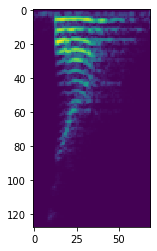

In [17]:
spectrogram = librosa.feature.melspectrogram(y=temp, sr=8000, n_fft=512, hop_length=128)
plt.imshow(np.log(spectrogram+1e-3))